# Lab Assignment 2

In the third assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning () repository on Github.

### Deadline October 26th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Scikit-learn has the dataset built in. The dataset contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the following cell shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
[[0 1 2 3 4]
 [5 6 7 8 9]]


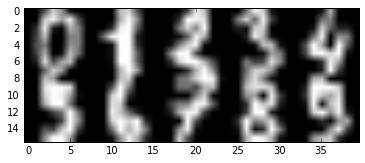

In [2]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('on')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print "The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10]))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. Also pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner.

Plot how your score on the test set improves over time. My best score was about 85% correct!

Make sure to comment your code.

In [3]:
#Make a prediction function h
def prediction_function(x,theta):
    #Sigmoid function determines which number it is based on image.
    #Theta has been transposed so the dot product between two vectors is possible.
    return 1.0 / (1.0 + np.exp(-dot(theta.T,x)))

In [4]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):
    #y is transposed to avoid dimension issue when calculating dot products. 
    cost = -(1.0 / len(x_predict)) * sum(dot(y.T,log(x_predict)) + dot((1-y.T),log(1 - x_predict)))
    return cost

In [5]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    #The gradient is the same as in linear regression, except given we are dealing with matrices,
    #the outer product is used because it allows us to have a 10x64 vector when transposed. 
    grad = (1.0 / len(x)) * outer((x_predict - y),x)                               
    return grad
    

The score of the algorithm on the test set is:  87.5420875421 %
The final cost of the algorithm is 0.0233277665608


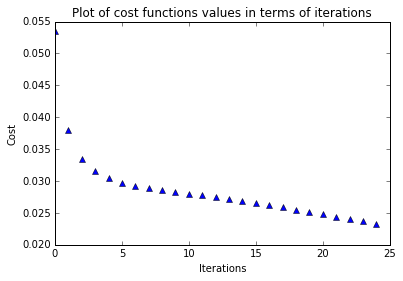

In [6]:
#Choose a suitable learning rate
alpha = 0.03
iterations = 25
theta = np.zeros((64,10))

#It is important to check that you're not overfitting by testing your prediction on a testset
x = reshape(digits.images[:1500],(1500,64))
x_test = reshape(digits.images[1500:],(297,64))

#Defines the targets to assess the cost on the training set and the accuracy on the test set. 
target = digits.target[:1500]
target_test = digits.target[1500:]

#Some value initialisation which will use (and explain) afterwards
score_old = 0
cost_values = []
i = 0


#A while loop seems to be more convenient in the event that the loop is
#interrupted to plot the graph and display error messages.
while i < iterations:
    i = i + 1
    
    #First loop over the training set x to learn from it.
    for j in range(x.shape[0]):
        #Calling the prediction_function and plugging a linearised form of the image
        #(the image is 8x8 so a vector with all the pixel values has length 64).
        x_predict = prediction_function(x[j,:],theta)
        
        #Creates target vector. The index of the number 1 determines the class of the image 
        y = zeros(10)
        y[target[j]] = 1
        
        #Runs gradient desdent alogrithm compute_gradient is transposed to allow vector multiplications.
        theta = theta - alpha * compute_gradient(x_predict,y,x[j,:]).T
    
    #Saves cost value
    cost_values.append(cost_function(x_predict, y))
    
    #Second part of each iteration to assess the accuracy of the learning algorithm starts here
    
    #score is a list emptied at each iteration to start assessment anew every iteraction
    score = []
    #Second loop to assess the accuracy of the algorithm on the training set x_test
    for k in range(x_test.shape[0]):
        #Runs prediction on the test set
        x_predict_test = prediction_function(x_test[k,:], theta)
        
        #Checks accuracy of prediction_function on x_test (i.e. if index of maximum value equals target_test)
        if argmax(x_predict_test) == target_test[k]:
            score.append(1)
        else:
            score.append(0)
    #Computes the score of the prediction function on the training set
    score_new = float(sum(score)) / float(len(score))*100
    
    #Breaks the loop to avoid overfitting if the score decreases, and warns the user where the overfitting occured
    if score_new < score_old:
        print "Error: the accuracy hasn't increased after running the", i,"th iteration. Forced to stop to avoid overfitting."
        break
    #Updates the score after comparison
    score_old = score_new

#Prints final score and cost
print "The score of the algorithm on the test set is: ", score_new, "%"
print "The final cost of the algorithm is", cost_function(x_predict, y)

#Plots the cost function of the fit
plt.plot(range(i),cost_values, '^')
plt.title('Plot of cost functions values in terms of iterations')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()